In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
from google.colab import files

upload = files.upload()

Saving house_prediction.csv to house_prediction.csv


In [3]:
df = pd.read_csv('house_prediction.csv')

In [4]:
df.shape

(21613, 21)

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df = df.dropna() 
df = df.drop(['id', 'date'], axis=1) 

In [7]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
X = df.iloc[:,1:]  # independent columns
Y = df.iloc[:,0]   # target column i.e price

In [10]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
prediction=reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


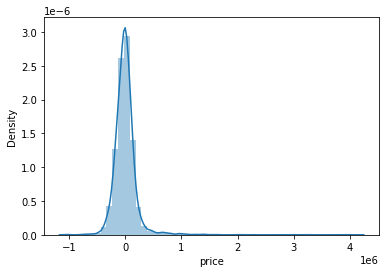

In [16]:
sns.distplot(Y_test-prediction)

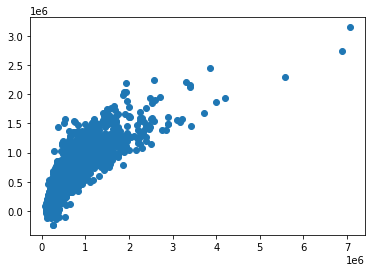

In [17]:
plt.scatter(Y_test, prediction)

In [22]:
from sklearn.metrics import r2_score

In [31]:
r2_score(Y_test, prediction)*100

68.77902899299173

In [24]:
from sklearn.metrics import mean_squared_error


In [33]:
mse = mean_squared_error(np.asarray(Y_test), prediction)
rmse = mse**0.5
print(rmse)

207035.93991252422
